# Exercício 2 - doenças cardíacas

O ficheiro heart.csv contém dados médicos usados para prever doenças cardíacas. Aqui está o resumo detalhado.

| Coluna    | Tipo    | Descrição resumida                                                        |
|-----------|---------|---------------------------------------------------------------------------|
| age       | int64   | Idade do paciente                                                         |
| sex       | int64   | Sexo (1 = masculino, 0 = feminino)                                        |
| cp        | int64   | Tipo de dor no peito (4 categorias)                                       |
| trestbps  | int64   | Pressão arterial em repouso                                               |
| chol      | int64   | Colesterol sérico em mg/dl                                                |
| fbs       | int64   | Açúcar no sangue > 120 mg/dl (1 = sim, 0 = não)                           |
| restecg   | int64   | Resultados do ECG em repouso                                              |
| thalach   | int64   | Frequência cardíaca máxima atingida                                       |
| exang     | int64   | Angina induzida por exercício (1 = sim, 0 = não)                          |
| oldpeak   | float64 | Depressão ST induzida por exercício                                       |
| slope     | int64   | Inclinação do segmento ST                                                 |
| ca        | int64   | Nº de vasos principais com coloração                                      |
| thal      | int64   | 3 = normal, 6 = defeito fixo, 7 = defeito reversível                      |
| target    | int64   | 1 = Doença cardíaca presente, 0 = ausente                                 |


Dados Limpos:
* Sem valores nulos – todos os campos estão completos.
* Variáveis numéricas categóricas (como cp, thal, slope, etc.) devem ser tratadas como categóricas codificadas.

Exemplo de Registos:

| age | sex | cp | trestbps | chol | fbs | restecg | thalach | exang | oldpeak | slope | ca | thal | target |
|-----|-----|----|----------|------|-----|---------|---------|-------|---------|--------|----|------|--------|
| 63  | 1   | 3  | 145      | 233  | 1   | 0       | 150     | 0     | 2.3     | 0      | 0  | 1    | 1      |
| 37  | 1   | 2  | 130      | 250  | 0   | 1       | 187     | 0     | 3.5     | 0      | 0  | 2    | 1      |
| 41  | 0   | 1  | 130      | 204  | 0   | 0       | 172     | 0     | 1.4     | 2      | 0  | 2    | 1      |


Este dataset é ideal para treinar modelos de classificação supervisionada como:
*Regressão logística
* Random Forest
* KNN
* SVM

O script completo para treinar e avaliar modelos de classificação com o ficheiro heart.csv encontra-se a seguir.

Este script inclui:
* Escalonamento dos dados
* Treino e avaliação com Random Forest
* Curva ROC e cálculo da AUC
* Validação cruzada (StratifiedKFold)
* Comparação com Decision Tree e Regressão Logística
* Ajuste de hiperparâmetros com GridSearchCV

Foram aplicados três modelos supervisionados de classificação, todos adequados à variável alvo target (binária: 0 = sem doença, 1 = com doença cardíaca):

1. Random Forest Classifier (RandomForestClassifier)
1. Decision Tree Classifier (DecisionTreeClassifier)
1. Regressão Logística (LogisticRegression)

In [11]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve 
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# 1. Carregar o dataset 

df = pd.read_csv("data/heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
# 2. Separar variáveis independentes e alvo 
X = df.drop(columns=["target"]) 
y = df["target"]

In [15]:
# 3. Escalonamento scaler = StandardScaler()
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

In [16]:
# 4. Divisão treino/teste X_train, X_test, y_train, y
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [17]:
# 5. Treino com Random Forest 
modelo = RandomForestClassifier(random_state=42) 
modelo.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Random Forest Report:
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61

Matriz de Confusão:


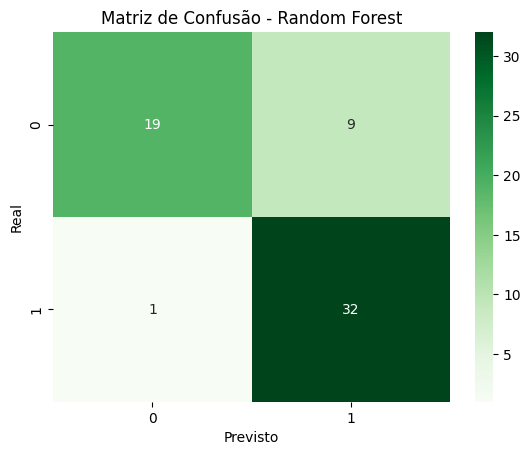

In [18]:
# 6. Avaliação
y_pred = modelo.predict(X_test)
print("Random Forest Report:") 
print(classification_report(y_test, y_pred)) 
print("Matriz de Confusão:") 
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens') 

plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

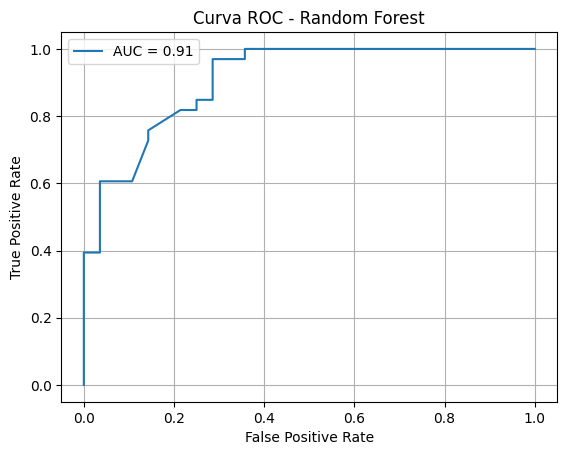

ROC AUC: 0.9091


In [19]:
# 7. ROC e AUC
y_proba = modelo.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.title("Curva ROC - Random Forest") 
plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate") 
plt.legend() 
plt.grid() 
plt.show() 
print(f"ROC AUC: {auc:.4f}")

In [20]:
# 8. Validação Cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(modelo, X_scaled, y, cv=cv)
print("Acurácias (CV):", scores) 
print("Acurácia Média (CV):", scores.mean())

Acurácias (CV): [0.85245902 0.83606557 0.75409836 0.8        0.81666667]
Acurácia Média (CV): 0.8118579234972676


In [23]:
# 9. Comparação com Árvore de Decisão
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_tree_pred = tree_model.predict(X_test)
print("Decision Tree Report:")
print(classification_report(y_test, y_tree_pred))


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61



In [24]:
# 10. GridSearchCV para Random Forest 
param_grid = { 
    'n_estimators': [50, 100, 200], 
    'max_depth': [3, 5, None], 
    'min_samples_split': [2, 5, 10] 
} 
grid = GridSearchCV(
    RandomForestClassifier(random_state=42), 
    param_grid, 
    cv=cv, 
    n_jobs=-1
) 
grid.fit(X_scaled, y)
print("Melhores hiperparâmetros:", grid.best_params_)
print("Melhor score:", grid.best_score_)

Melhores hiperparâmetros: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
Melhor score: 0.8447540983606556


In [25]:
#11. Comparação adicional: Regressão Logística 
log_model = LogisticRegression(max_iter=1000) 
log_model.fit(X_train, y_train) 
y_log_pred = log_model.predict(X_test) 
print("Logistic Regression Report:") 
print(classification_report(y_test, y_log_pred))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



---
end of file